Exemplo de código feito para o gene KP32gp15, para correr outros genes será necessário fazer algumas mudanças em nomes de variaveis, e salientar que os ficheiros deverão se encontar na mesma pasta que este ficheiro e poderão também ter outros nomes sendo necessário alterar no código os nomes dos mesmos

## Packages necessários para correr os códigos

In [1]:
%pip install biopython matplotlib



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Informações genómicas

Nesta secção, procede-se à obtenção do **genoma de referência** a partir da base de dados do NCBI e à extração da informação associada a um gene específico com base no respetivo **GeneID**. A partir do ficheiro GenBank descarregado, são identificadas as **anotações do gene** e da respetiva **CDS**, permitindo a extração das **sequências nucleotídica** e **proteica**, bem como das principais **características funcionais**, que são posteriormente guardadas em formato **FASTA** para análises subsequentes.

In [2]:
from Bio import Entrez, SeqIO
import time
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def buscar_genoma(email, cod_NCBI, api_key=None):
    """
    Descarrega um genoma do NCBI e guarda-o em formato GenBank (.gb)
    """
    Entrez.email = email
    if api_key:
        Entrez.api_key = api_key

    try:
        handle = Entrez.efetch(
            db="nucleotide",
            id=cod_NCBI,
            rettype="gb",
            retmode="text"
        )
        record = SeqIO.read(handle, "genbank")
        handle.close()

        with open(f"{cod_NCBI}.gb", "w") as output:
            SeqIO.write(record, output, "genbank")

        print(f"Genoma {cod_NCBI} descarregado com sucesso.")

        time.sleep(1)

    except Exception as e:
        print("Erro ao contactar o NCBI.")
        print(e)



def extrair_gene(cod_NCBI, gene_id):
    """
    Extrai informação completa de um gene (feature 'gene')
    com base no GeneID.

    É necessário utilizar o buscar_genoma antes ou obter o
    ficheiro .gb antes de proceder com este.
    """
    with open(f"{cod_NCBI}.gb", "r") as ficheiro:
        genome = SeqIO.read(ficheiro, "genbank")

    for feature in genome.features:
        if feature.type == "gene":
            if gene_id in feature.qualifiers.get("db_xref", []):

                start = int(feature.location.start)
                end = int(feature.location.end)
                strand = feature.location.strand

                locus_tag = feature.qualifiers.get("locus_tag", [""])[0]
                gene_name = feature.qualifiers.get("gene", [""])[0]
                db_xref = feature.qualifiers.get("db_xref", [])

                # sequência de DNA
                gene_seq = genome.seq[start:end]

                record = SeqRecord(
                    gene_seq,
                    id=gene_id,
                    description=f"locus_tag={locus_tag}"
                )

                with open(f"{gene_id}_gene.fasta", "w") as output:
                    SeqIO.write(record, output, "fasta")

                print("\n=== GENE ===")
                print(f"GeneID: {gene_id}")
                print(f"Locus tag: {locus_tag}")
                print(f"Gene name: {gene_name}")
                print(f"Localização: {start}..{end} (strand {strand})")
                print(f"db_xref: {db_xref}")

                return {
                    "GeneID": gene_id,
                    "locus_tag": locus_tag,
                    "gene_name": gene_name,
                    "start": start,
                    "end": end,
                    "strand": strand,
                    "db_xref": db_xref
                }

    print(f"Gene {gene_id} não encontrado.")
    return None

def extrair_cds(cod_NCBI, gene_id):
    """
    Extrai informação completa da CDS associada a um GeneID.

    É necessário utilizar o buscar_genoma antes ou obter o
    ficheiro .gb antes de proceder com este.
    """
    with open(f"{cod_NCBI}.gb", "r") as ficheiro:
        genome = SeqIO.read(ficheiro, "genbank")

    for feature in genome.features:
        if feature.type == "CDS":
            if gene_id in feature.qualifiers.get("db_xref", []):

                locus_tag = feature.qualifiers.get("locus_tag", [""])[0]
                product = feature.qualifiers.get("product", [""])[0]
                protein_id = feature.qualifiers.get("protein_id", [""])[0]
                translation = feature.qualifiers.get("translation", [""])[0]
                note = feature.qualifiers.get("note", [""])[0]
                ec = feature.qualifiers.get("EC_number", [""])[0]
                transl_table = feature.qualifiers.get("transl_table", [""])[0]

                start = int(feature.location.start)
                end = int(feature.location.end)
                strand = feature.location.strand
                protein_len = len(translation)

                record = SeqRecord(
                    Seq(translation),
                    id=protein_id if protein_id else gene_id,
                    description=product
                )

                with open(f"{gene_id}_protein.fasta", "w") as output:
                    SeqIO.write(record, output, "fasta")

                print("\n=== CDS ===")
                print(f"GeneID: {gene_id}")
                print(f"Locus tag: {locus_tag}")
                print(f"Protein ID: {protein_id}")
                print(f"Produto: {product}")
                print(f"Comprimento: {protein_len} aa")
                print(f"Localização: {start}..{end} (strand {strand})")
                if ec:
                    print(f"EC number: {ec}")
                if note:
                    print(f"Nota: {note}")

                return {
                    "GeneID": gene_id,
                    "locus_tag": locus_tag,
                    "protein_id": protein_id,
                    "product": product,
                    "length_aa": protein_len,
                    "start": start,
                    "end": end,
                    "strand": strand,
                    "EC_number": ec,
                    "note": note,
                    "transl_table": transl_table
                }

    print(f"CDS associada a {gene_id} não encontrada.")
    return None



## Início da análise

In [3]:
email = "...@gmail.com"   #Substituir ... por um email válido
genoma = "NC_013647.1"
gene_id = "GeneID:8676101"

Iníciamos por buscar o genoma do gene, a partir da função **buscar_genoma()**

In [4]:
buscar_genoma(email,genoma)

Genoma NC_013647.1 descarregado com sucesso.


De seguida extraimos o gene utilizando a função **extrair_gene()**

In [5]:
extrair_gene(genoma,gene_id)


=== GENE ===
GeneID: GeneID:8676101
Locus tag: KP-KP32_gp37
Gene name: 37
Localização: 33419..36029 (strand 1)
db_xref: ['GeneID:8676101']


{'GeneID': 'GeneID:8676101',
 'locus_tag': 'KP-KP32_gp37',
 'gene_name': '37',
 'start': 33419,
 'end': 36029,
 'strand': 1,
 'db_xref': ['GeneID:8676101']}

Extraimos também a informação completa da **CDS** associada a um GeneID, recorrendo ao uso da função **extrair_cds()**

In [6]:
extrair_cds(genoma,gene_id)


=== CDS ===
GeneID: GeneID:8676101
Locus tag: KP-KP32_gp37
Protein ID: YP_003347555.1
Produto: tail protein
Comprimento: 869 aa
Localização: 33419..36029 (strand 1)


{'GeneID': 'GeneID:8676101',
 'locus_tag': 'KP-KP32_gp37',
 'protein_id': 'YP_003347555.1',
 'product': 'tail protein',
 'length_aa': 869,
 'start': 33419,
 'end': 36029,
 'strand': 1,
 'EC_number': '',
 'note': '',
 'transl_table': '11'}

## Blast

O BLAST foi utilizado para identificar **sequências homólogas** ao gene em
estudo, permitindo a comparação da sequência query com sequências
depositadas na base de dados do NCBI. Esta análise tem como objetivo
detetar **regiões conservadas** e selecionar sequências relacionadas para
análises posteriores, nomeadamente **inferência filogenética** e **variant
calling**.


In [7]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from io import StringIO
import os
import re

def run_blast(input_data, program, database, hitlist_size=500, e_value=10.0, low_complexity_filter=False, save_xml=True):
    """
    Executa BLAST via NCBIWWW.qblast com parâmetros ajustados para resultados próximos ao site NCBI.

    Parâmetros:
    - input_data: str ou SeqRecord ou arquivo FASTA
    - program: 'blastn', 'blastp', etc.
    - database: 'nt', 'nr', etc.
    - hitlist_size: número máximo de hits a retornar (default 500)
    - e_value: cutoff do E-value (default 10.0)
    - low_complexity_filter: aplicar filtro de regiões de baixa complexidade (default False)
    - save_xml: salvar XML localmente

    Retorna:
    - dict: Dicionário onde cada chave é "seq_X" (ex: "seq_1", "seq_2") e cada valor é
      um objeto Blast record do Biopython (NCBIXML.Blast) correspondente à sequência processada.
      Esses objetos podem ser usados para extrair alinhamentos, HSPs e outras informações do BLAST.
    """
    
    # Confirma se o input é correto
    if isinstance(input_data, str) and os.path.isfile(input_data):
        seq_records = list(SeqIO.parse(input_data, "fasta"))
    elif isinstance(input_data, str):
        seq_records = [SeqRecord(Seq(input_data), id="input_sequence")]
    elif isinstance(input_data, SeqRecord):
        seq_records = [input_data]
    else:
        raise TypeError("input_data inválido")

    resultados = {}

    for i, seq in enumerate(seq_records, start=1):
        seq_str = str(seq.seq)

        # Pegar só a parte antes do ':' e tornar o nome do ficheiro "guardavel"
        match = re.search(r'\[GeneID=(\d+)\]', seq.description)
        if match:
                safe_id = match.group(1)
        else:
            safe_id = re.sub(r'[^A-Za-z0-9_\-]', '_', seq.id)
        xml_name = f"blast_result_{safe_id}_{program}.xml"



        print(f"A correr {program} -> {xml_name}")
        # faz o blast
        if program == "blastn":
            handle = NCBIWWW.qblast(
                program=program,
                database=database,
                sequence=seq_str,
                hitlist_size=hitlist_size,
                expect=e_value,
                entrez_query='NOT Klebsiella[All Fields] AND NOT phage[All Fields]',
                filter='L' if low_complexity_filter else 'F',  # 'F' desativa filtro
                format_type='XML'
            )
        else:
            handle = NCBIWWW.qblast(
                program=program,
                database=database,
                sequence=seq_str,
                hitlist_size=hitlist_size,
                expect=e_value,
                filter='L' if low_complexity_filter else 'F',  # 'F' desativa filtro
                format_type='XML'
            )
        xml_text = handle.read()
        handle.close()

         # salva o XML localmente, se na funçao tiver save_xml=True
        if save_xml:
            with open(xml_name, "w", encoding="utf-8") as f:
                f.write(xml_text)
            
        #cria um objeto Blast record do biopython que é armazenado no dicionário de resultados
        blast_record = NCBIXML.read(StringIO(xml_text))
        resultados[f"seq_{i}"] = blast_record

    return resultados


def get_top_hits(blast_record, top_n=10):
    """
    Retorna os detalhes dos top N hits de um blast_record como uma lista de dicionários.

    Parâmetros:
    - blast_record: objeto BLAST do Biopython (NCBIXML.read)
    - top_n: número de hits a retornar (default 10)

    Retorna:
    - List[Dict]: cada elemento é um hit com os dados de seus HSPs
    """
    top_hits = []
    alignments = blast_record.alignments[:top_n]
    # ve os hits e aponta as chaves desse hit
    for i, aln in enumerate(alignments, start=1):
        hit_data = {
            "hit_number": i,
            "accession": aln.accession,
            "definition": aln.hit_def,
            "hsps": []
        }
        # ve o hsp e atualiza as chaves desse hsp
        for hsp in aln.hsps:
            hsp_data = {
                "e_value": hsp.expect,
                "score": hsp.score,
                "bit_score": hsp.bits,
                "query_start": hsp.query_start,
                "query_end": hsp.query_end,
                "subject_start": hsp.sbjct_start,
                "subject_end": hsp.sbjct_end,
                "align_length": hsp.align_length,
                "identities": hsp.identities,
                "gaps": hsp.gaps
            }
            hit_data["hsps"].append(hsp_data)

        top_hits.append(hit_data)

    return top_hits



Corremos primeiro o blast com a função **run_blast()**, escolhendo o tipo de blast no parametro **"program"** e escolhendo a base de dados no parametro **"database"**

A função corre o BLAST via NCBIWWW.qblast com parâmetros ajustados para resultados próximos ao site NCBI

In [ ]:
results = run_blast(
    "ficheiro.fasta",  # Inserir o nome do ficheiro fasta
    program="blastp",  # escolher o programa 
    database="nr",     # escolher a database
)

Com esses resultados filtramos apenas os 10 melhores hit com a função **get_top_hits()**

In [ ]:
blast_record = results["seq_1"] 
get_top_hits(blast_record, top_n=10)

## Árvore filogenética

A análise filogenética teve como objetivo inferir as **relações
evolutivas** entre a sequência query e as sequências homólogas
identificadas pelo BLAST.


In [10]:
from Bio.Blast import NCBIXML
from Bio import Entrez, SeqIO, AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import subprocess
import os
import matplotlib.pyplot as plt
import re


def msa_from_blastp_xml(
    xml_file: str,
    query_fasta: str,
    output_fasta: str = "hits_prot.fasta",
    n_hits: int = 10,
    email: str = "teu_email@email.com",
):
    """
    Os resultados BLASTp em formato XML foram processados, sendo selecionados os n melhores alinhamentos.
    Para cada hit identificado, foi obtida a sequência proteica completa associada ao respetivo accession,
    recorrendo à base de dados protein do NCBI. A sequência proteica da query foi incluída juntamente com
    as proteínas homólogas recuperadas, formando um ficheiro FASTA multi-sequência. Este ficheiro serviu
    de base para o alinhamento múltiplo de sequências e para a inferência filogenética subsequente,
    baseada em sequências de aminoácidos.
    """

    Entrez.email = email

    records = []
    id_to_organism = {}

    print("Proteínas incluídas:")

    query = SeqIO.read(query_fasta, "fasta")
    query_id = "query"
    query.id = query_id
    query.name = query_id

    records.append(query)
    id_to_organism[query_id] = query.description
    print(f" - {query.description}")

    with open(xml_file) as f:
        blast_record = NCBIXML.read(f)

    if not blast_record.alignments:
        raise ValueError("O XML não contém alinhamentos BLASTp.")

    for aln in blast_record.alignments[:n_hits]:

        organism = aln.hit_def
        organism = organism.split(">")[0].strip()

        handle = Entrez.efetch(
            db="protein",
            id=aln.accession,
            rettype="fasta",
            retmode="text"
        )

        rec = SeqIO.read(handle, "fasta")
        handle.close()

        safe_id = f"prot{len(records)}"
        rec.id = safe_id
        rec.name = safe_id
        rec.description = organism

        records.append(rec)
        id_to_organism[safe_id] = organism

        print(f" - {organism}")

    SeqIO.write(records, output_fasta, "fasta")
    print(f"\nFASTA criado: {output_fasta}")
    print(f"Total de proteínas: {len(records)}")

    return output_fasta, id_to_organism


def run_mafft(
    input_fasta: str,
    mafft_path: str,
    output_fasta: str = "hits_prot_aligned.fasta"
):
    """
    O alinhamento múltiplo de sequências proteicas foi realizado utilizando o software MAFFT.
    O ficheiro FASTA multi-sequência, contendo a proteína query e as proteínas homólogas
    recuperadas por BLASTp, foi utilizado como input, sendo aplicado o modo --auto, que
    permite ao MAFFT selecionar automaticamente a estratégia de alinhamento mais adequada.
    O alinhamento resultante foi guardado num novo ficheiro FASTA, que serviu de base para
    a análise filogenética subsequente.
    """

    print("\nA correr MAFFT...")

    with open(output_fasta, "w") as out:
        subprocess.run(
            [mafft_path, "--auto", input_fasta],
            stdout=out,
            stderr=subprocess.DEVNULL,
            check=True,
            shell=True
        )

    print(f"MSA concluído: {output_fasta}")
    return output_fasta


def phylo_tree_prot(aligned_fasta: str, id_to_organism: dict):
    """
    A função phylo_tree_prot constrói uma árvore filogenética a partir de um alinhamento
    múltiplo de sequências proteicas. O alinhamento é utilizado para calcular uma matriz
    de distâncias baseada na identidade entre aminoácidos, refletindo a proporção de
    diferenças observadas entre as sequências. Com base nesta matriz de distâncias,
    a árvore filogenética é inferida recorrendo ao método UPGMA e posteriormente
    visualizada de forma gráfica, permitindo a interpretação das relações evolutivas
    entre as proteínas analisadas.
    """

    alignment = AlignIO.read(aligned_fasta, "fasta")

    calculator = DistanceCalculator("identity")
    dm = calculator.get_distance(alignment)

    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)

    for clade in tree.get_nonterminals():
        clade.name = None

    fig, ax = plt.subplots(figsize=(20, 10))  
    plt.rcParams.update({"font.size": 14})

    Phylo.draw(
        tree,
        axes=ax,
        label_func=lambda clade: id_to_organism.get(clade.name)
        if clade.is_terminal()
        else None,
        do_show=False
    )

    x_left, x_right = ax.get_xlim()
    ax.set_xlim(x_left, x_right * 1.8)

    plt.subplots_adjust(left=0.05, right=0.72)

    plt.show()


    return tree

In [ ]:
xml_file = "ficheiro.xml"  #Inserir o nome do ficheiro xml correto
query_fasta = "ficheiro.fasta"  #Inserir o nome do ficheiro fasta correto
email = "...@gmail.com"  # Substituir os ... por um emails válido 

mafft_path = r"C:\Users\luisp\Downloads\mafft-7.526-win64-signed\mafft-win\mafft.bat"
# O caminho para o executável do MAFFT deve ser adaptado ao sistema operativo e à instalação local do utilizador que executar o código.



Começamos por extrair regiões homólogas do BLAST, recorrendo ao uso da função **msa_from_blastp_xml()**

In [13]:
fasta_hits, id_to_organism = msa_from_blastp_xml(
    xml_file=xml_file,
    query_fasta=query_fasta,
    email=email,
    n_hits=10
)


Proteínas incluídas:
 - NC_013647.1:10420-10875 Klebsiella phage KP32, complete genome
 - amidase [Klebsiella phage KP32]
 - endolysin [Klebsiella phage vB_KpnP_cmc356ctg1]
 - amidase [Klebsiella phage KP32_isolate 192]
 - lysozyme/N-acetylmuramoyl-L-alanine amidase [Klebsiella phage KMI1]
 - endolysin [Klebsiella phage NL_ZS_1]
 - N-acetylmuramoyl-L-alanine amidase [Klebsiella phage KMI2]
 - peptidoglycan recognition protein family protein, partial [Escherichia coli]
 - hypothetical protein FPAPBKPN_00018 [Klebsiella phage vB_KpnP_2146-HW]
 - amidase [Klebsiella phage KP32_isolate 195]
 - hypothetical protein [Klebsiella phage 175005]

FASTA criado: hits_prot.fasta
Total de proteínas: 11


De seguida, executamos o alinhamento múltiplo recorrendo a função **run_mafft()** 

In [14]:
aligned_fasta = run_mafft(
    input_fasta=fasta_hits,
    mafft_path=mafft_path,
    output_fasta="hits_nucl_aligned.fasta"
)


A correr MAFFT...
MSA concluído: hits_nucl_aligned.fasta


Por fim construimos a **árvore filogenética**

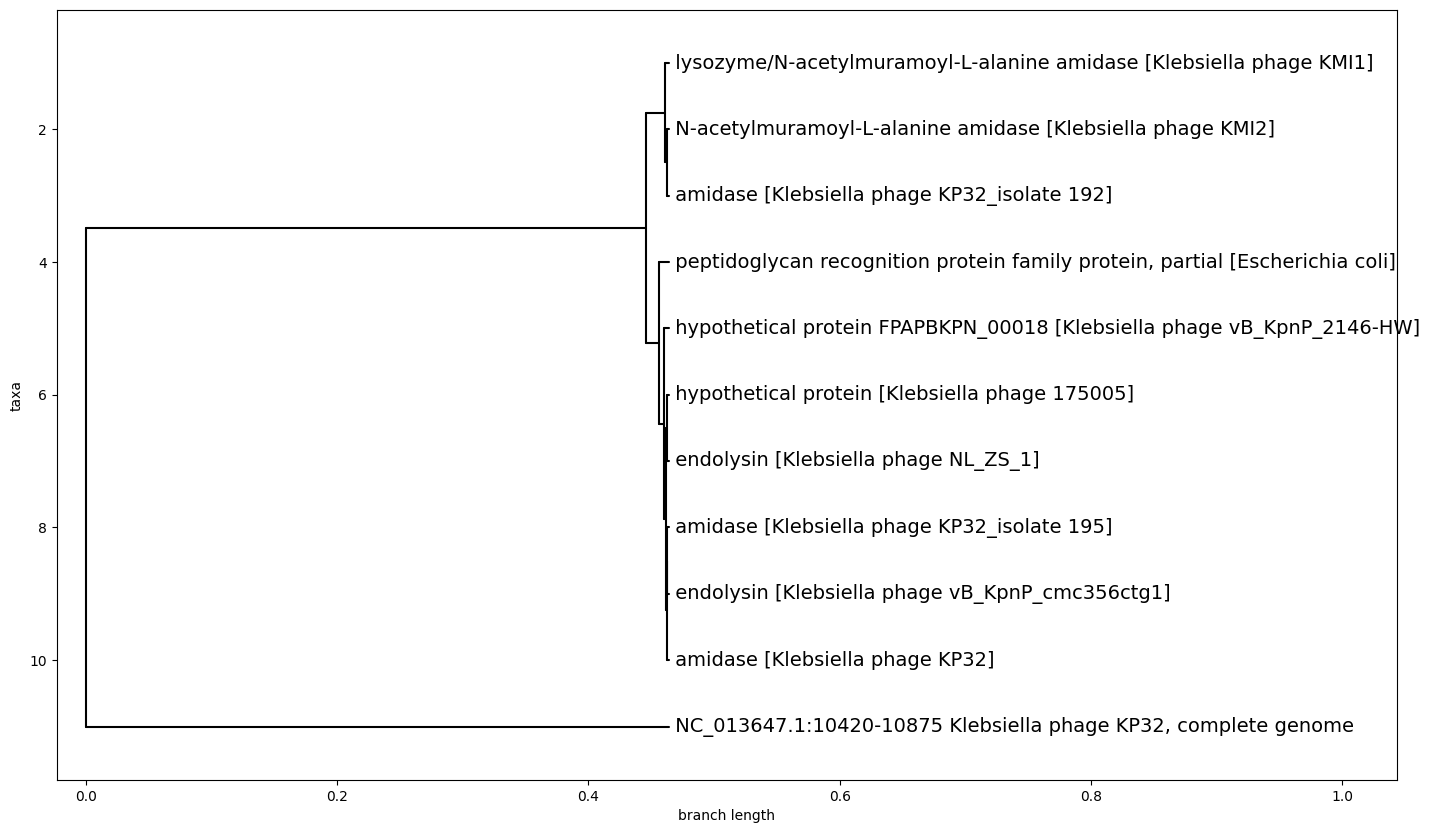

In [16]:
tree = phylo_tree_prot(
    aligned_fasta=aligned_fasta,
    id_to_organism=id_to_organism
)

## Seleção de sequências homólogas para alinhamento

Nesta etapa, o objetivo primordial é através do **BLAST**, identificamos e recrutarmos as sequências homólogas que apresentem divergência nucleotídica ou proteica em relação à nossa sequência *query*.

### Critérios de filtragem e variabilidade
Procedemos à **filtragem** de *hits* com $100\%$ de identidade. Esta abordagem deve-se a:
* **Sequências redundantes** não acrescentam valor informativo;
* A análise foca-se na **variabilidade genética** e na identificação de sítios conservados ao longo da evolução.

### Preparação de dados para o MEGA
O ficheiro **FASTA multi-sequência** resultante agrupa a sequência original e as suas variantes evolutivas. Este dataset servirá de *input* direto para as etapas seguinte:
    
* **Alinhamento Múltiplo de Sequências (MSA)** (utilizando algoritmos como ClustalW ou Muscle no software **MEGA**).

In [17]:
def buscar_gene(cod_NCBI,gene):
    """
    Esta função permite ir buscar um gene a um genoma .gb, e devolve informações sobre o mesmo, juntamente com um ficheiro fasta com a sequência do mesmo.

    cod_NCBI: aceita um código de genoma do NCBI
    gene: aceita um GeneID no formato 'GeneID:XXXXXXX'
    """
    with open(f"{cod_NCBI}.gb", "r") as ficheiro:
        genoma = SeqIO.read(ficheiro, "genbank")
    for i, feature in enumerate(genoma.features):
        if feature.type == "gene":
            db_xrefs = feature.qualifiers.get("db_xref", [])
            if gene in db_xrefs:
                cod=re.search(r"[\d]+",gene)
                start = int(feature.location.start)
                end = int(feature.location.end)
                location = genoma.seq[start:end+1]
                locus = feature.qualifiers.get("locus_tag", [""])[0]
                record = SeqRecord(seq=location,id=gene,description=locus)
                with open(f"{cod[0]}.fasta","w") as output:
                    SeqIO.write(record, output, "fasta")
                print(f"{gene} encontrado")
                print("Posição no ficheiro:", i)
                print("Localização:", feature.location)
                return feature

    print(f"{gene} não encontrado.")
    return None

def buscar_traducao(cod_NCBI,gene):
    """
    Esta função permite ir buscar a CDS associada a um gene de um genoma .gb, e devolve informações sobre o mesmo.

    cod_NCBI: aceita um código de genoma do NCBI
    gene: aceita um GeneID no formato 'GeneID:XXXXXXX'
    """
    with open(f"{cod_NCBI}.gb", "r") as ficheiro:
        genome = SeqIO.read(ficheiro, "genbank")

    for i, feature in enumerate(genome.features):
        if feature.type == "CDS":
            db_xrefs = feature.qualifiers.get("db_xref", [])
            if gene in db_xrefs:
                cod=re.search(r"[\d]+",gene)
                locus = feature.qualifiers.get("locus_tag", [""])[0]
                protein_seq = feature.qualifiers.get("translation", [""])[0]
                record = SeqRecord(seq=Seq(protein_seq),id=gene,description=locus)
                with open(f"{cod[0]}_translated.fasta","w") as output:
                    SeqIO.write(record, output, "fasta")
                print(f"CDS de {gene} encontrado")
                print("Posição no ficheiro:", i)
                print("Localização:", feature.location)
                return feature

In [18]:
buscar_gene(genoma,gene_id)

GeneID:8676101 encontrado
Posição no ficheiro: 119
Localização: [33419:36029](+)


SeqFeature(SimpleLocation(ExactPosition(33419), ExactPosition(36029), strand=1), type='gene', qualifiers=...)

In [19]:
buscar_traducao(genoma,gene_id)

CDS de GeneID:8676101 encontrado
Posição no ficheiro: 120
Localização: [33419:36029](+)


SeqFeature(SimpleLocation(ExactPosition(33419), ExactPosition(36029), strand=1), type='CDS', qualifiers=...)

Primeiro vámos usar os ficheiros FASTA do nosso gene e a sua sequência protéica como sequências *query* para procurar sequências semelhantes no NCBI.

Vamos realizar duas pesquisas distintas:
1.  **BLASTn (nt):** Compara a nossa sequência de **DNA** contra a base de dados de nucleótidos.
2.  **BLASTp (nr):** Compara a nossa sequência de **Proteína** contra a base de dados de proteínas não redundantes.

> **Nota:** Guardamos os resultados em listas (`lista_nucl` e `list_prot`). Para se quiséssemos analisar multiplos genes de uma vez, o código funciona da mesma forma para todos.

In [ ]:
resultado_blast_gene15 = run_blast("ficheiro.fasta", "blastn", "nt", 10)     #Inserir o nome do  fasta correto e escolher o programa e database

lista_nucl = [resultado_blast_gene15]

In [ ]:
resultado_blast_proteina15 = run_blast("ficheiro.fasta", "blastp", "nr", 10)    #Inserir o nome do ficheiro fasta correto e escolher o programa e database

list_prot = [resultado_blast_proteina15]

Antes de exportar os dados, é importante verificar se o BLAST encontrou resultados que fazem sentido biologicamente. Esta função auxiliar ajuda-nos a ler as métricas principais:

* **Identidade (%):** O grau de semelhança. (Ex: 99% indica que quase todos os nucleótidos são iguais, mas existe alguma variação).
* **Cobertura (%):** Quanto da nossa sequência original foi alinhada. (Uma cobertura baixa pode indicar que encontrámos apenas um fragmento do gene noutro organismo).

No default da função `get_top_hits` são imprimidos os 5 melhores resultados para confirmar se está tudo no caminho certo.

In [ ]:
def mostrar_resultados(registo_blast):
    """
    Processa e exibe no ecrã um resumo estatístico dos melhores hits de um registo BLAST.
    
    A função calcula a percentagem de identidade e de cobertura da query para cada hit,
    imprimindo o Accession, descrição, E-value e as métricas calculadas.

    Parâmetros:
    - registo_blast: objeto Blast do Biopython (Bio.Blast.Record.Blast) contendo
      os resultados de uma query individual.

    Retorna:
    - None: Apenas imprime os dados formatados na consola.
    """
    
    # Extrair o objeto se for passado um dicionário
    if isinstance(registo_blast, dict):
        if not registo_blast:
            print("Objeto vazio.")
            return
        # Pega no primeiro valor do dicionário
        registo_blast = list(registo_blast.values())[0]

    # Verifica se temos resultados válidos
    if not registo_blast:
        print("Objeto vazio ou inválido.")
        return

    meus_hits = get_top_hits(registo_blast, top_n=5)
    
    # Tamanho da Query
    tamanho_total_query = registo_blast.query_letters

    # --- 2. CORREÇÃO AQUI ---
    # Usamos apenas .query ou uma string fixa caso falhe. Removemos .id
    nome_query = getattr(registo_blast, 'query', 'Query Desconhecida')
    # ------------------------

    print(f"--- ANÁLISE PARA: {nome_query} ---")

    for hit in meus_hits:
        hsp = hit['hsps'][0]
        
        len_alinhamento = hsp.get('aln_span', hsp.get('align_length'))
        num_identidades = hsp['identities']
        
        identidade_pc = (num_identidades / len_alinhamento) * 100
    
        if tamanho_total_query > 0:
            cobertura_pc = (len_alinhamento / tamanho_total_query) * 100
        else:
            cobertura_pc = 0
            
        if cobertura_pc > 100: cobertura_pc = 100.0

        print(f"HIT: {hit['accession']}")
        descricao = hit.get('description', hit.get('definition', 'Sem descrição'))
        print(f"Descrição: {descricao[:80]}...") 
        print(f"  > E-value:    {hsp['e_value']:.2e}")   
        print(f"  > Identidade: {identidade_pc:.2f}%")   
        print(f"  > Cobertura:  {cobertura_pc:.2f}%")
        print("-" * 40)


In [ ]:
mostrar_resultados(lista_nucl[0])

Como o nosso objetivo é alinhar sequências para ver variações, nós criámos a função `guardar_para_mega`. A função faz o seguinte:
1.  **Adiciona a sequência query (original):** O ficheiro final começa sempre com a nossa sequência original (para servir de comparação).
2.  **Ignora duplicados (100% Identidade):** Se um organismo no NCBI tiver uma sequência *exatamente igual*, ele não nos dá informação nova sobre variantes. Por isso, o código **descarta** hits com identidade igual ao tamanho do alinhamento.
3.  **Respeita as coordenadas:** Para nucleótidos, o código descarrega apenas a região homóloga ao nosso gene, e não o genoma inteiro da bactéria/fago.

O resultado será um ficheiro `.fasta` limpo, contendo apenas variantes, pronto a importar no MEGA.

In [ ]:
def guardar_para_mega(resultado_blast, email, database, nome_do_ficheiro, quantidade, ficheiro_original):
    """
    Processa os resultados do BLAST para extrair variantes genéticas e guardar num ficheiro FASTA, 
    preparando os dados para alinhamento no MEGA.

    A função realiza os seguintes passos:
    1. Se fornecido, adiciona a sequência original (query) no início do ficheiro para servir de referência.
    2. Percorre os hits do BLAST e ignora sequências 100% idênticas à query.
    3. Descarrega as sequências das variantes encontradas:
        - Se database='protein': baixa as sequências de aminoácidos completas.
        - Se database='nucleotide': baixa apenas a região alinhada (o gene), respeitando as coordenadas.

    Parâmetros:
    - resultado_blast: Objeto com o resultado de uma query BLAST.
    - email: O email (obrigatório para o NCBI).
    - database: "protein" ou "nucleotide".
    - nome_do_ficheiro: Nome do ficheiro de saída (.fasta).
    - quantidade: Número máximo de variantes a guardar.
    - ficheiro_original: Caminho para o ficheiro FASTA com a sequência query original.
    """
    Entrez.email = email
    
    lista_ids_proteinas = []
    
    with open(nome_do_ficheiro, "w") as ficheiro_saida:
        
        # Ficheiro original
        try:
            with open(ficheiro_original, "r") as f_orig:
                conteudo = f_orig.read().strip()
                
                if conteudo:
                    ficheiro_saida.write(conteudo)
                    ficheiro_saida.write("\n\n") 
            
            print("A query original foi adicionada com sucesso.")
        except Exception as e:
            print(f"Não consegui ler o ficheiro original: {e}")
        
        conta = 0
        
        if isinstance(resultado_blast, dict):
             if not resultado_blast: return
             resultado_blast = list(resultado_blast.values())[0]

        for alinhamento in resultado_blast.alignments:
            if conta >= quantidade:
                break
            
            hsp = alinhamento.hsps[0]
            
            # Ignorar 100% iguais (Variant Calling)
            if hsp.identities == hsp.align_length:
                print(f"-> A ignorar {alinhamento.accession} (é 100% igual)")
                continue 

            accession = alinhamento.accession
            
            if database == "nucleotide":
                # Para nucleótidos, baixamos região específica
                start = hsp.sbjct_start
                end = hsp.sbjct_end
                
                if start < end:
                    s_start, s_end, strand_val = start, end, 1
                else:
                    s_start, s_end, strand_val = end, start, 2
                
                try:
                    handle = Entrez.efetch(
                        db="nucleotide", 
                        id=accession, 
                        rettype="fasta", 
                        retmode="text",
                        seq_start=s_start, 
                        seq_stop=s_end,
                        strand=strand_val
                    )
                    
                    # Lê e limpa espaços extra
                    seq_dados = handle.read().strip()
                    
                    # Escreve a sequência e força linha em branco
                    ficheiro_saida.write(seq_dados)
                    ficheiro_saida.write("\n\n")
                    
                    handle.close()
                    conta += 1
                except Exception as e:
                    print(f"Erro ao baixar região de {accession}: {e}")

            else:
                lista_ids_proteinas.append(accession)
                conta += 1

        # Processamento de Proteínas
        if database == "protein" and lista_ids_proteinas:
            try:
                handle = Entrez.efetch(
                    db="protein", 
                    id=lista_ids_proteinas, 
                    rettype="fasta", 
                    retmode="text"
                )
                
                dados_prot = handle.read().strip()
                ficheiro_saida.write(dados_prot)
                ficheiro_saida.write("\n\n")
                
                handle.close()
                print("Sucesso! Proteínas guardadas.")
            except Exception as e:
                print(f"Erro ao baixar proteínas: {e}")
        
        elif database == "nucleotide" and conta > 0:
            print("Regiões de genes guardadas.")
        
        elif conta == 0:
            print("Aviso: Nenhuma sequência foi guardada.")

Por fim, corremos este código para gerar os ficheiros finais.

O *loop* `for` vai percorrer os resultados do BLAST e aplicar a função de filtragem que explicámos acima. Esta estrutura de repetição permite-nos aplicar as filtragens a vários resultados de BLAST de forma automática (caso tivéssemos uma lista com vários genes).

No final, teremos ficheiros `sequencias_mega_....fasta` na pasta, prontos a usar na ferramenta MEGA.

In [ ]:
nomes_genes = ["gene15"]

ficheiros_originais = ["ficheiro.fasta"] #Inserir o nome do  fasta correto

for i, dicionario_blast in enumerate(lista_nucl):
    
    registo_blast = list(dicionario_blast.values())[0]
    
    nome_atual = nomes_genes[i]
    ficheiro_orig = ficheiros_originais[i]
    
    nome_ficheiro_saida = f"sequencias_mega_{nome_atual}.fasta"
    
    guardar_para_mega(
        resultado_blast=registo_blast,        
        email="...@gmail.com",  #Substituir os ... por um email válido
        database="nucleotide",  # escolher a data base correta      
        nome_do_ficheiro=nome_ficheiro_saida,
        quantidade=10,
        ficheiro_original=ficheiro_orig
    )
    print(f"Concluído para {nome_atual}.\n")

In [ ]:
nomes_proteinas = ["proteina15"]

ficheiros_originais = ["ficheiro.fasta"]    #Inserir o nome do  fasta correto
for i, dicionario_blast in enumerate(list_prot): 
    
    registo_blast = list(dicionario_blast.values())[0]
    
    nome_atual = nomes_proteinas[i]
    ficheiro_orig = ficheiros_originais[i]
    
    nome_ficheiro_saida = f"sequencias_mega_{nome_atual}.fasta"

    guardar_para_mega(
        resultado_blast=registo_blast,        
        email="...@gmail.com",     #Substituir os ... por um email válido
        database="protein",        # escolher a data base correta
        nome_do_ficheiro=nome_ficheiro_saida,
        quantidade=10,
        ficheiro_original=ficheiro_orig)
    print(f"Concluído para {nome_atual}.\n")